In [1]:
from lisa.lisa_pipeline import LISAPipeline
from PIL import Image
import os
from tqdm import tqdm
lisa_model_type = "xinlai/LISA-7B-v1-explanatory"
lisa_conv_type = "llava_llama_2"
lisa_pipeline = LISAPipeline(lisa_model_type, local_rank=0, load_in_4bit=False, load_in_8bit=True, conv_type=lisa_conv_type)

/root/miniconda3/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/root/miniconda3/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
images_root = 'data/nerf_llff_data/room/images_4'
image_names = os.listdir(images_root)
image_names = [image_name for idx, image_name in enumerate(image_names) if idx % 8 == 0]
image_paths = [os.path.join(images_root, image_name) for image_name in image_names]
prompt = 'what can be used to play videos'
lisa_text_prompt = f'Can you segment {prompt}?'
save_path = f'output/lisa/room/{prompt}'
os.makedirs(save_path, exist_ok=True)
# image_names = os.listdir(images_root)
# image_paths = [os.path.join(images_root, name) for name in image_names]
# images = [Image.open(path) for path in image_paths]


In [35]:
image_names

['DJI_20200226_143850_006.png',
 'DJI_20200226_143901_419.png',
 'DJI_20200226_143912_008.png',
 'DJI_20200226_143926_241.png',
 'DJI_20200226_143938_168.png',
 'DJI_20200226_143948_113.png']

In [36]:
for i in tqdm(range(len(image_paths))):
    image_name = image_names[i]
    image_path = image_paths[i]
    image = Image.open(image_path)
    result_list, mask_result_list, mask_list, mask_rgb_list, output_str = lisa_pipeline(lisa_text_prompt, image=image)
    save_name = image_name.split('.')[0] + '.png'
    Image.fromarray(mask_list[0]).save(os.path.join(save_path, save_name))
    

 17%|█▋        | 1/6 [00:01<00:07,  1.57s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] .</s>


 33%|███▎      | 2/6 [00:03<00:06,  1.53s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] .</s>


 50%|█████     | 3/6 [00:04<00:04,  1.52s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] .</s>


 67%|██████▋   | 4/6 [00:06<00:03,  1.51s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] .</s>


 83%|████████▎ | 5/6 [00:07<00:01,  1.52s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] .</s>


100%|██████████| 6/6 [00:09<00:00,  1.58s/it]

text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment what can be used to play videos? [/INST] Sure, it is [SEG] . [SEG] .</s>


In [3]:
result_list, mask_result_list, mask_list, mask_rgb_list, output_str = lisa_pipeline(lisa_text_prompt, image=images[0])

/root/miniconda3/lib/python3.8/site-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(


text_output:  <s>[INST] <<SYS>>You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.<</SYS>> <im_start> <im_end> Can you segment the biggest tree? [/INST] Sure, [SEG] .</s>


In [7]:
mask_list[0].shape

(756, 1008)

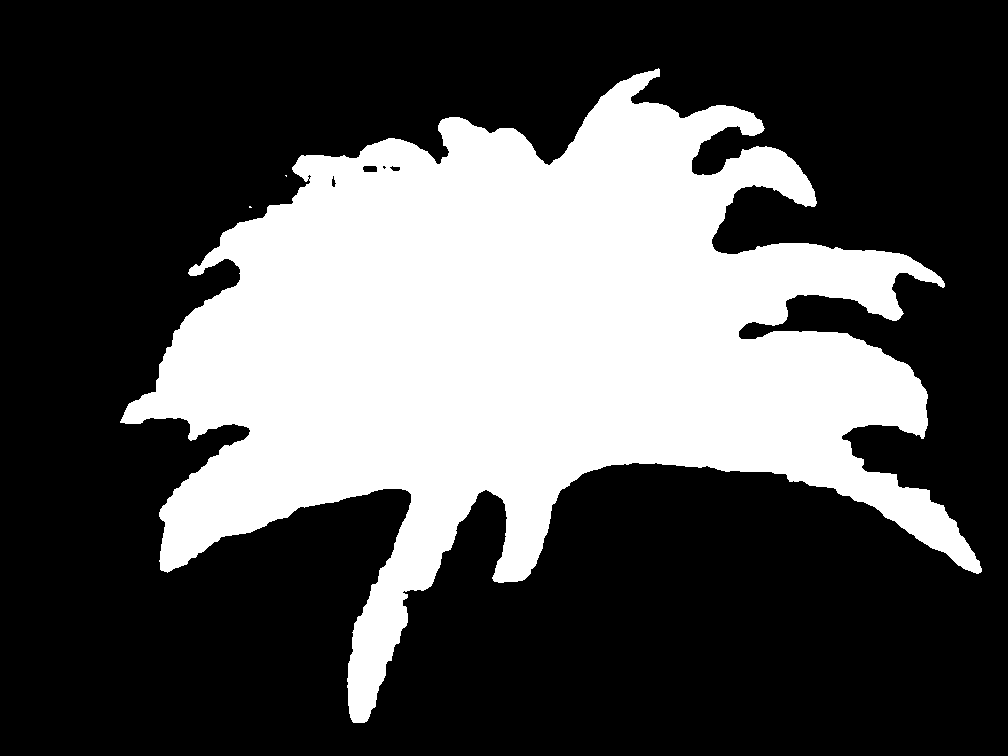

In [6]:
Image.fromarray(mask_list[0])